In [28]:
#Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly as ply
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, jaccard_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import random
from sklearn.metrics import classification_report
from random import randint
import warnings
warnings.filterwarnings("ignore")
import os
for path, _,file in os.walk('Y:/Data science/archive/'):
                            for f in file:
                               print(os.path.join(path, f))



In [29]:
colors = [ '#d62728','#2ca02c']

#Colour palette
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
#          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [30]:
#read the csv
sd = pd.read_csv('./jm1.csv')

In [31]:
sd.describe().T

,count,mean,std,min,25%,50%,75%,max
loc,10885.0,42.016178,76.593332,1.0,11.00,23.00,46.00,3442.00
v(g),10885.0,6.348590,13.019695,1.0,2.00,3.00,7.00,470.00
ev(g),10885.0,3.401047,6.771869,1.0,1.00,1.00,3.00,165.00
iv(g),10885.0,4.001599,9.116889,1.0,1.00,2.00,4.00,402.00
n,10885.0,114.389738,249.502091,0.0,14.00,49.00,119.00,8441.00
v,10885.0,673.758017,1938.856196,0.0,48.43,217.13,621.48,80843.08
l,10885.0,0.135335,0.160538,0.0,0.03,0.08,0.16,1.30
d,10885.0,14.177237,18.709900,0.0,3.00,9.09,18.90,418.20
i,10885.0,29.439544,34.418313,0.0,11.86,21.93,36.78,569.78
e,10885.0,36836.365343,434367.801255,0.0,161.94,2031.02,11416.43,31079782.27


In [32]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [33]:
#Convert the object type to numeric
for x in sd.iloc[:, 16:21]:
    sd[x] = pd.to_numeric(sd[x], errors='coerce')

In [34]:
#Determine the class imbalance in the target variable
print(sd.groupby('defects').size())

defects
False    8779
True     2106
dtype: int64


In [35]:
#Check Unique values on the dataset to take care of high cardinality features
sd.nunique()

loc                   365
v(g)                  108
ev(g)                  74
iv(g)                  82
n                     806
v                    3991
l                      55
d                    2695
i                    4268
e                    6978
b                     310
t                    6761
lOCode                291
lOComment              88
lOBlank                95
locCodeAndComment      30
uniq_Op                68
uniq_Opnd             171
total_Op              581
total_Opnd            468
branchCount           146
defects                 2
dtype: int64

<Axes: >

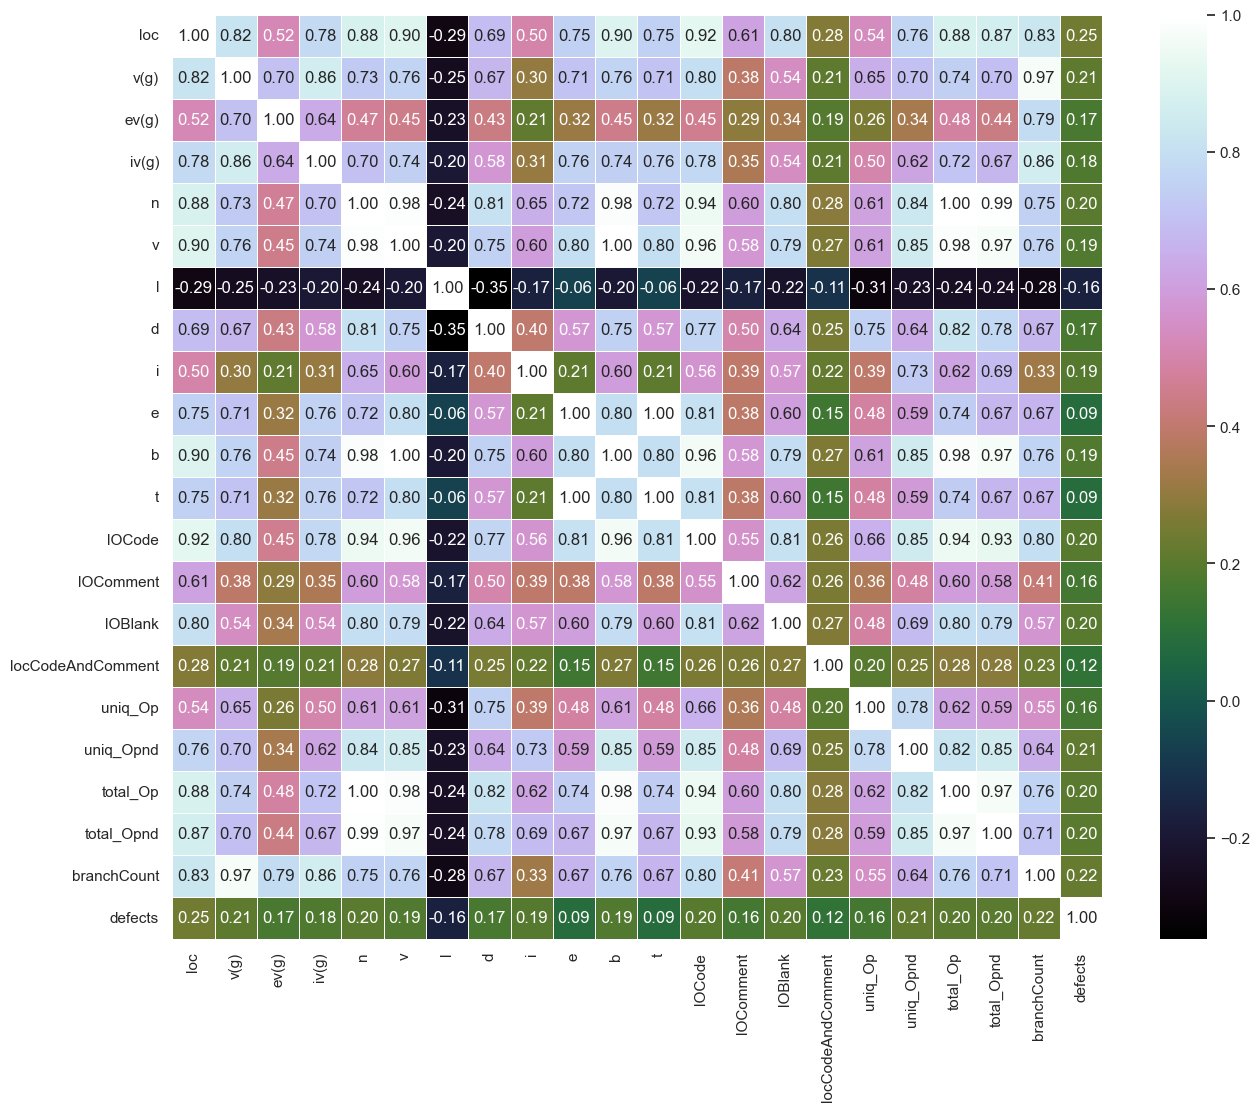

In [36]:
#Plot the correlation using heatmap

cor = sd.corr()
sns.set(rc={'figure.figsize':(15,12)})

sns.heatmap(cor,annot=True, linewidths = .5, fmt = '.2f',cmap='cubehelix')


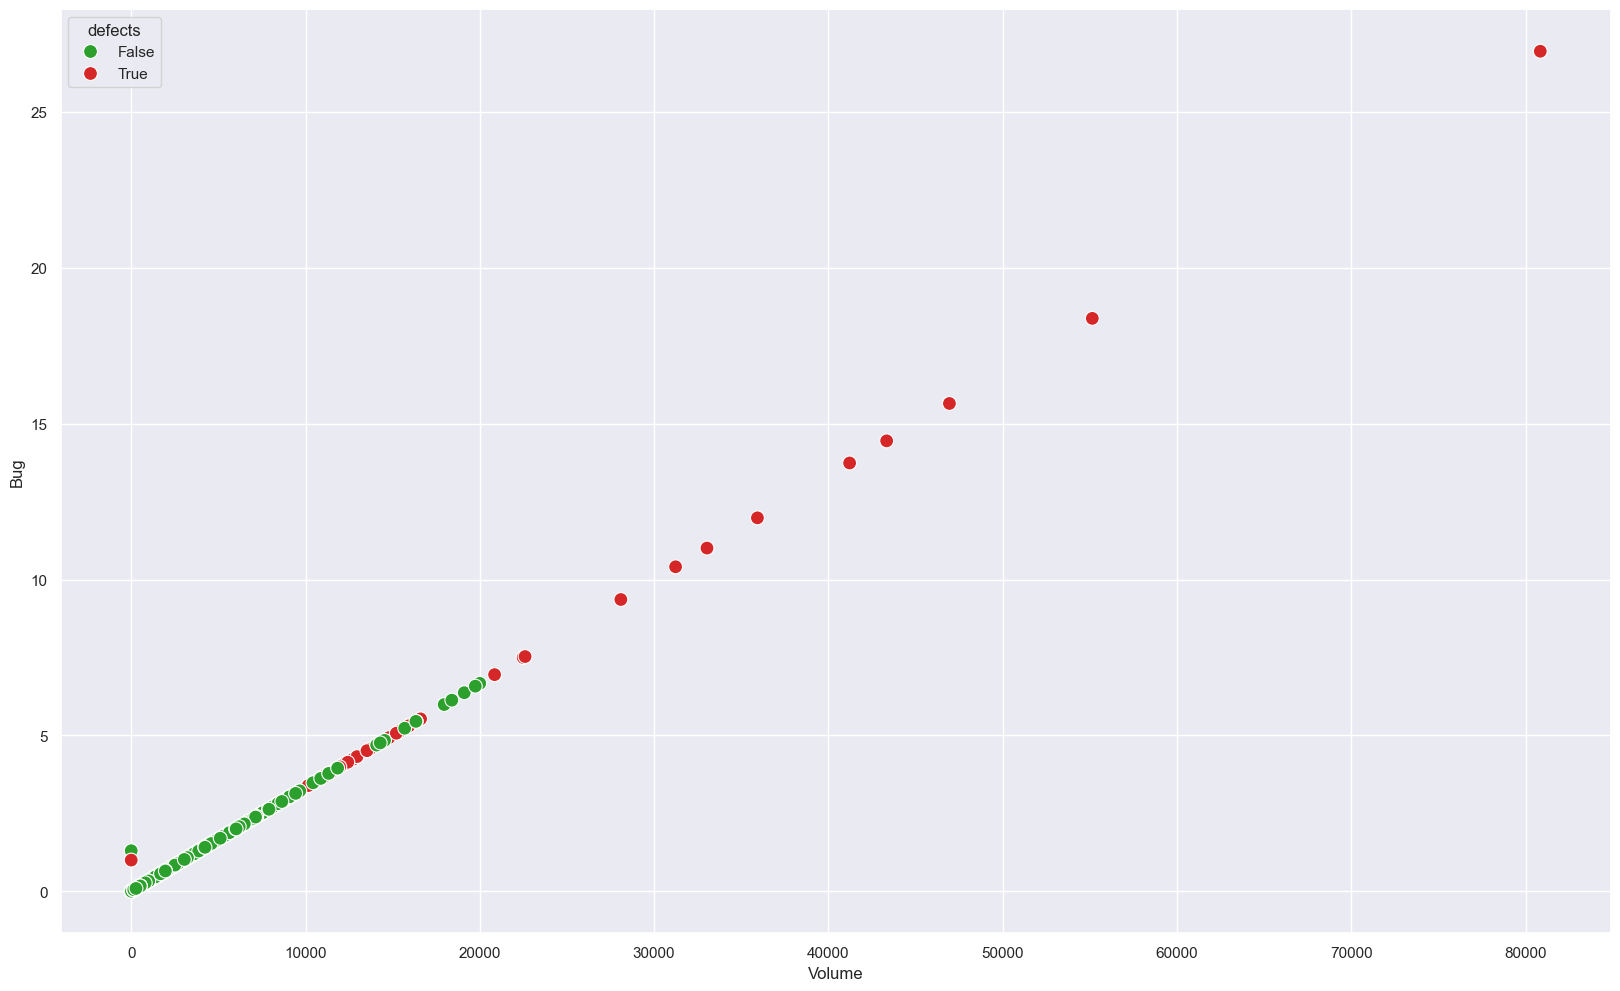

In [37]:
#Check for relations and insights between volume of code and the number of defective code
sns.set(rc={'figure.figsize':(20,12)})
fig=sns.scatterplot(data=sd,x=sd['v'],y=sd['b'], hue=sd['defects'],s=100,marker='o',palette=['#2ca02c','#d62728'])
fig.set(xlabel='Volume', ylabel='Bug')
mpl.show()

#Inference - Higher volume of code higher the bugs

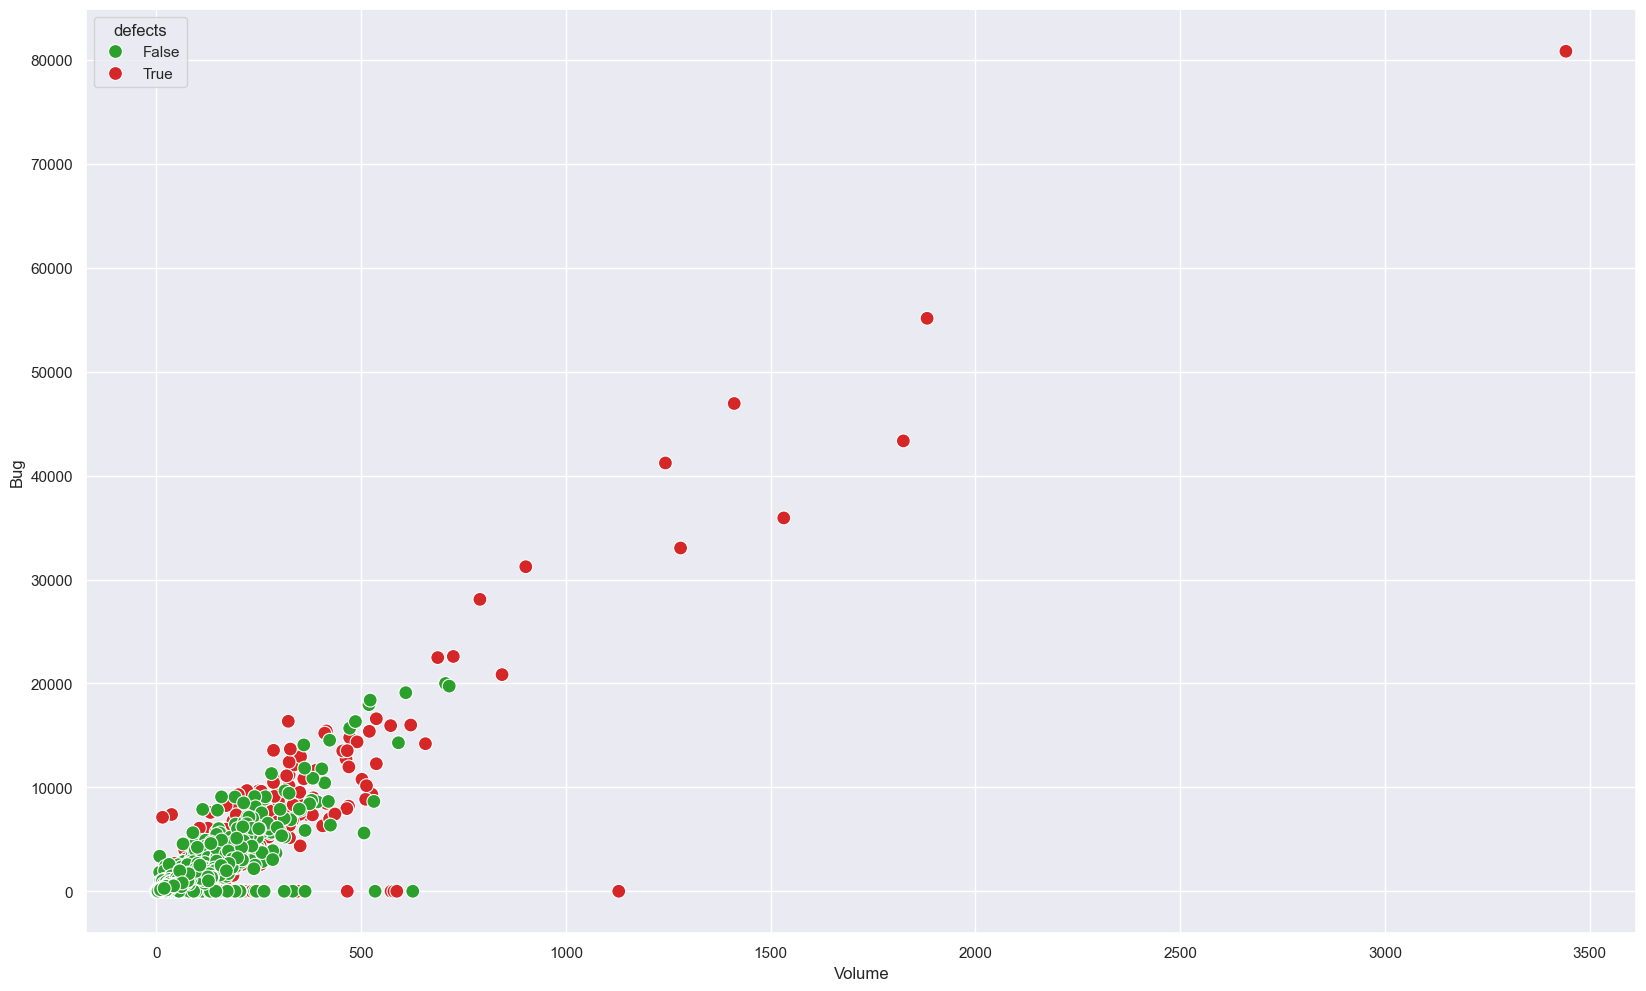

In [38]:
sns.set(rc={'figure.figsize':(20,12)})
fig=sns.scatterplot(data=sd,x=sd['loc'],y=sd['v'], hue=sd['defects'],s=100,marker='o',palette=['#2ca02c','#d62728'])
fig.set(xlabel='Volume', ylabel='Bug')
mpl.show()

# Bugs identified even if volume of code is low. So there is no rule of thumb that bug do not occur if volume of code is low

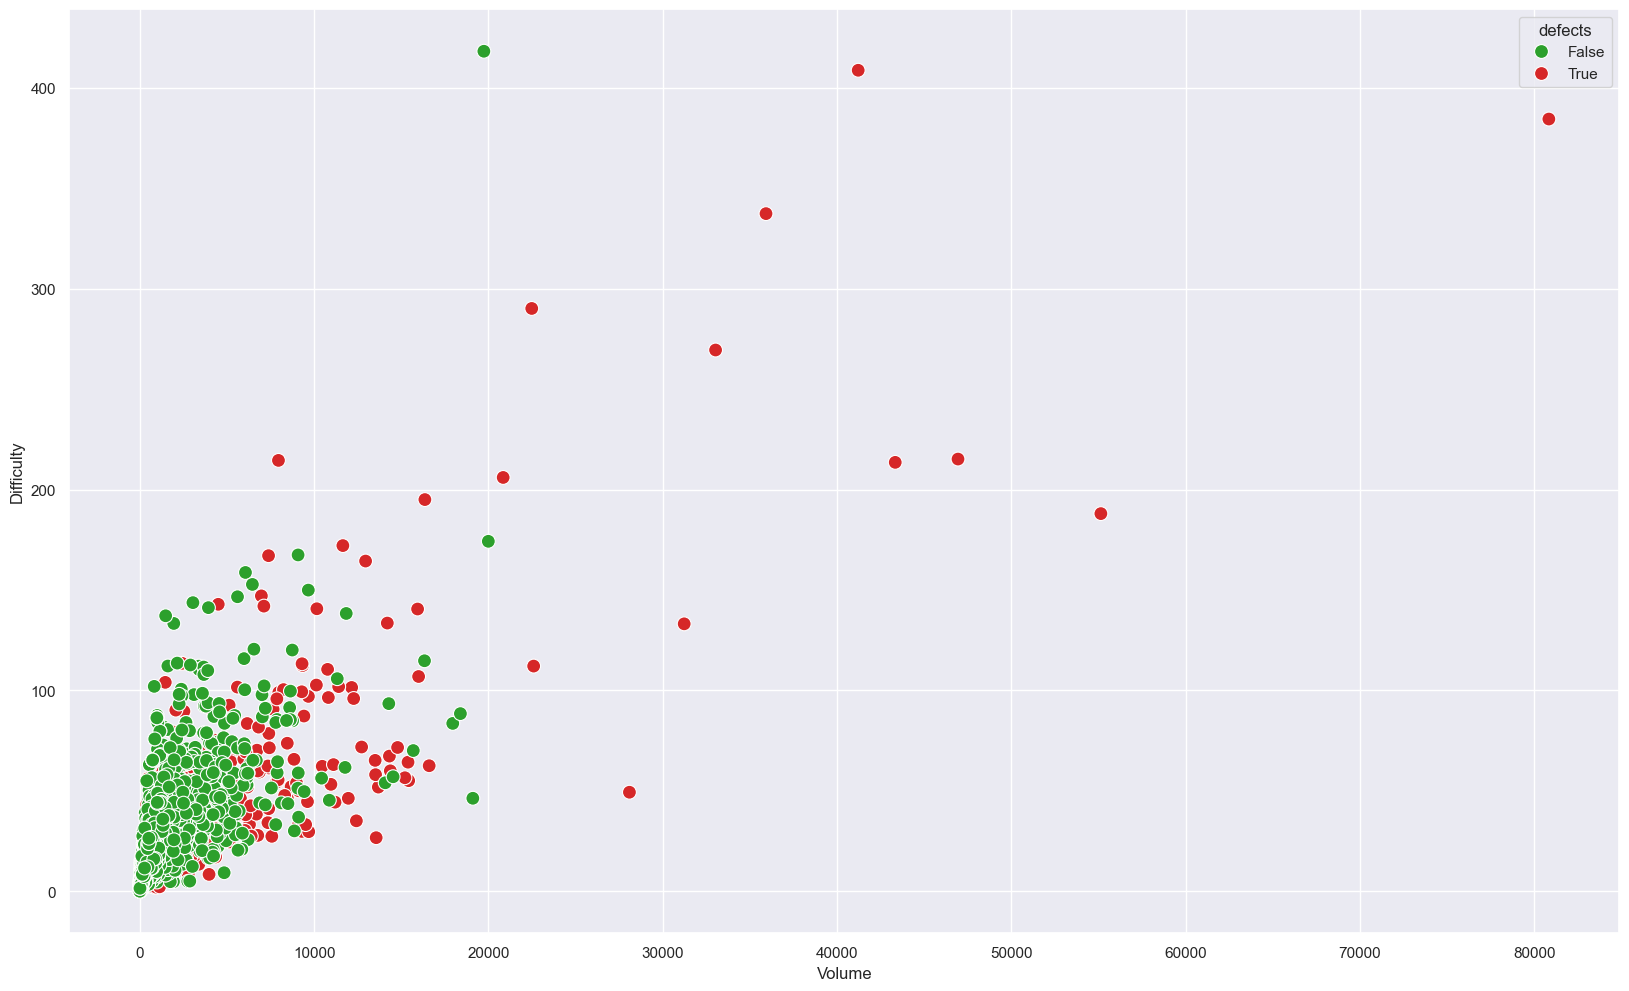

In [39]:
sns.set(rc={'figure.figsize':(20,12)})
fig=sns.scatterplot(data=sd,x=sd['v'],y=sd['d'], hue=sd['defects'],s=100,marker='o',palette=['#2ca02c','#d62728'])
fig.set(xlabel='Volume', ylabel='Difficulty')
mpl.show()

#Difficulty is high with higher volume of code. Higher the difficulty higher the defects

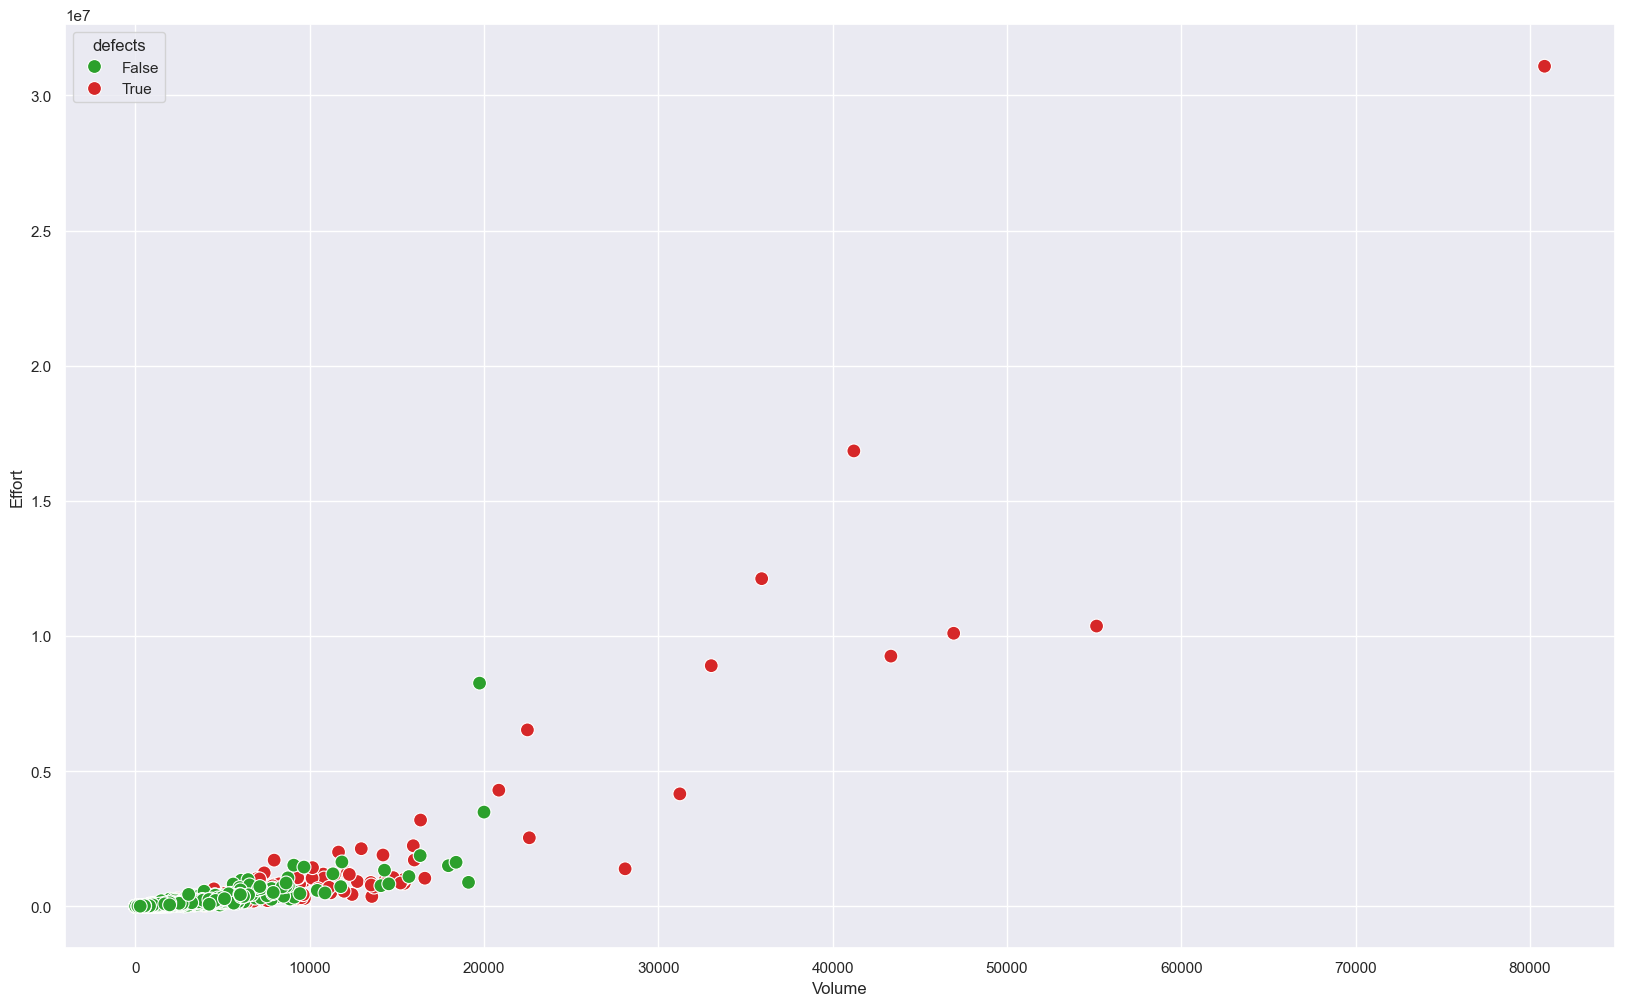

In [40]:
sns.set(rc={'figure.figsize':(20,12)})
fig=sns.scatterplot(data=sd,x=sd['v'],y=sd['e'], hue=sd['defects'],s=100,marker='o',palette=['#2ca02c','#d62728'])
fig.set(xlabel='Volume', ylabel='Effort')
mpl.show()


#Effort is also higher if volume of code is high. Higher the effort higher the defects

<Axes: xlabel='loc', ylabel='e'>

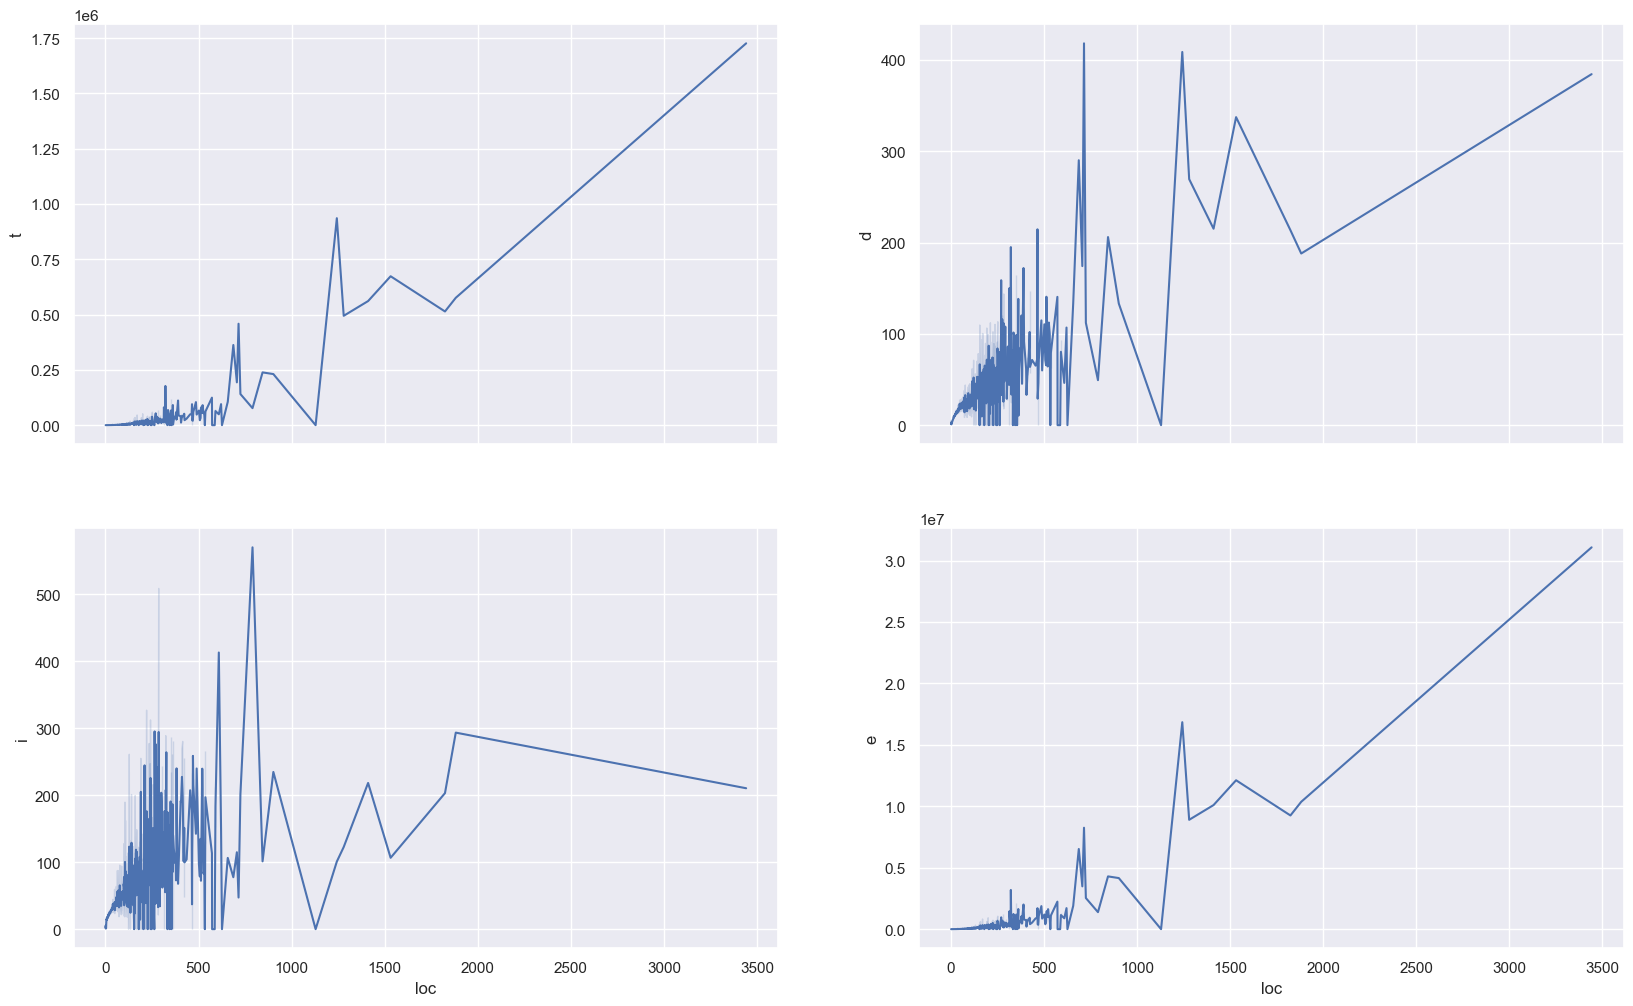

In [41]:
# sns.set(rc={'figure.figsize':(15,5)})

#line of code vs time,difficulty,intelligence and effort

fig, axes = mpl.subplots(2, 2, sharex=True, figsize=(20,12))




fig = sns.lineplot(x=sd['loc'],y=sd['t'],ax=axes[0,0])
# fig.set(xlabel='Line of Code', ylabel='Time')


sns.lineplot(x=sd['loc'],y=sd['d'],palette=['r'],data=sd,ax=axes[0,1])

sns.lineplot(x=sd['loc'],y=sd['i'],ax=axes[1,0])

sns.lineplot(x=sd['loc'],y=sd['e'],ax=axes[1,1])




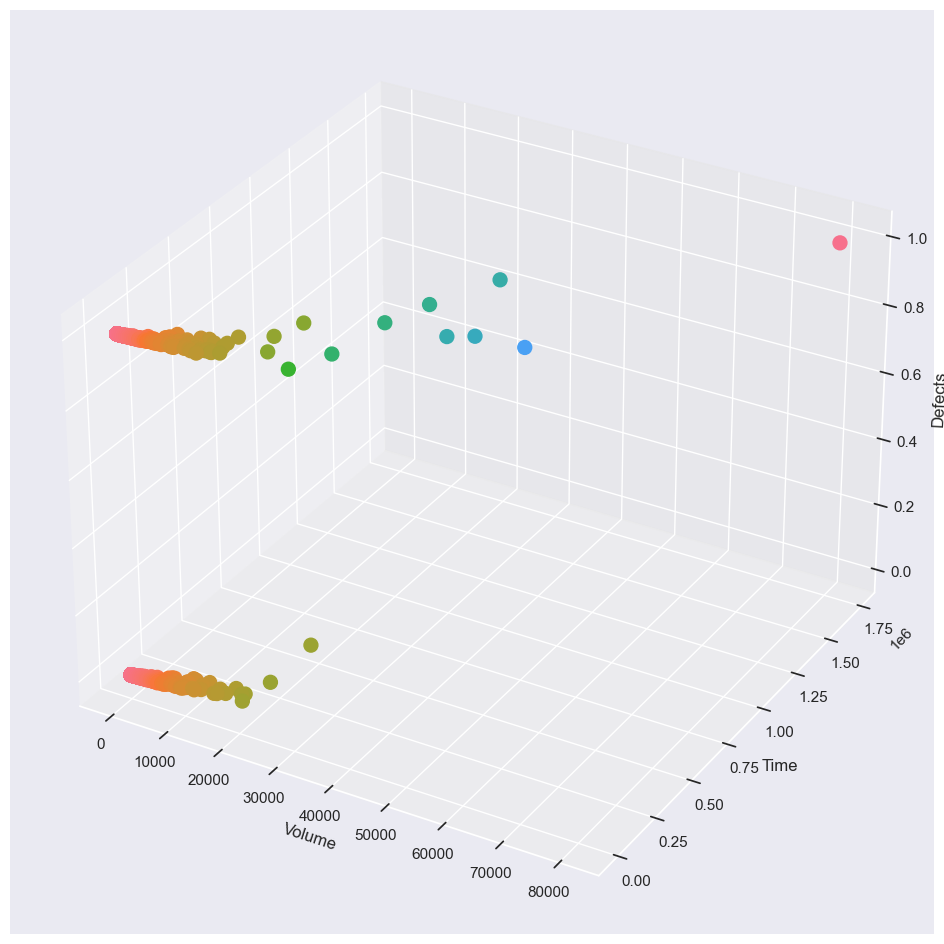

In [42]:
#3D plot to visualize the volume, time and defects

sns.set(style = "darkgrid")
f = mpl.figure(figsize=(20,12))
ax = f.add_subplot(111, projection = '3d')

x = sd['v']
y = sd['t']
z = sd['defects']

ax.set_xlabel("Volume")
ax.set_ylabel("Time")
ax.set_zlabel("Defects")
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.scatter(x, y, z, s=100, c=x, cmap=cmap, alpha=1)


mpl.show()

<Axes: xlabel='uniq_Op'>

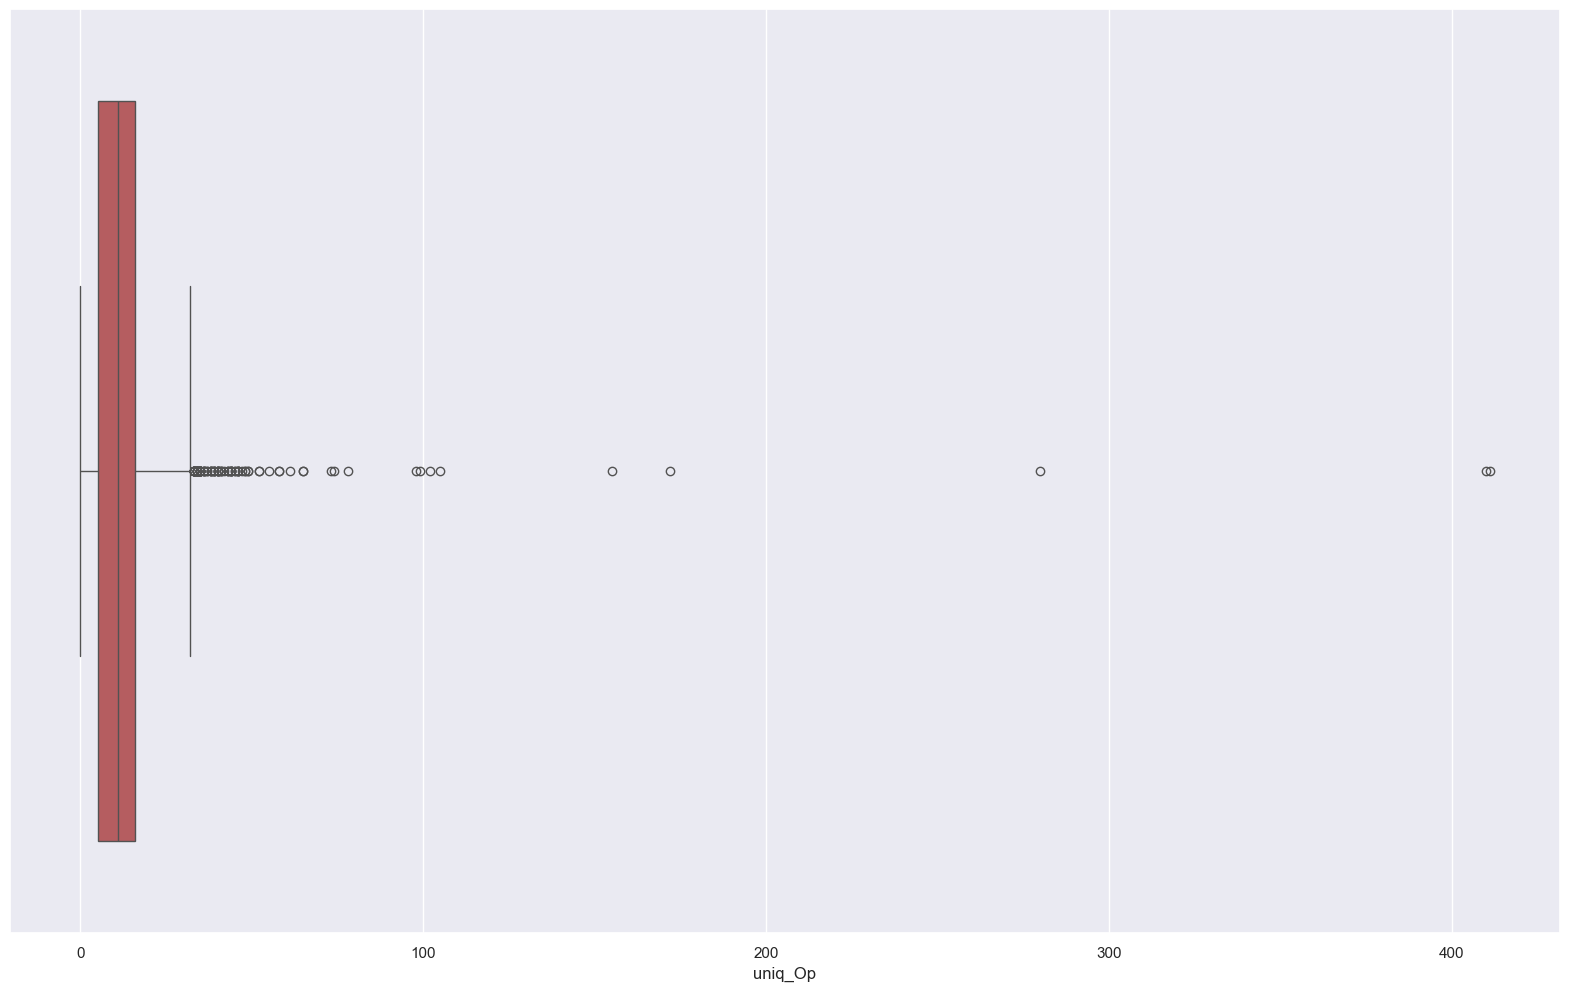

In [43]:
#Outlier analysis
sns.set(rc={'figure.figsize':(20,12)})
sns.boxplot(x=sd['uniq_Op'],color='r')

In [44]:
# % of defect and non defect
100 * (sd['defects'].value_counts()/len(sd))

defects
False    80.652274
True     19.347726
Name: count, dtype: float64

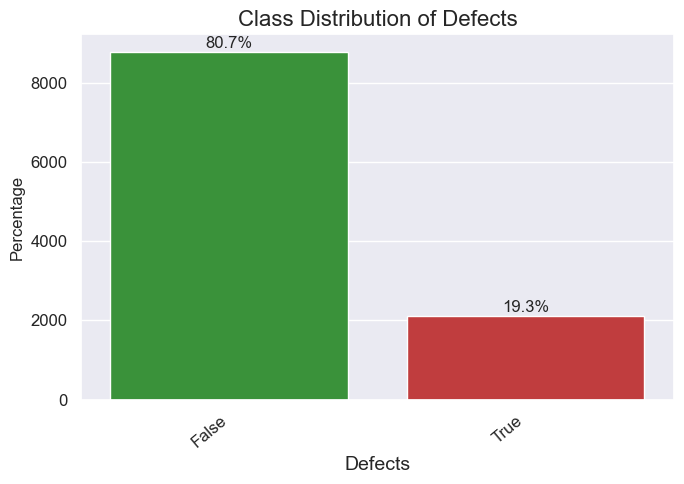

In [45]:
#Class imbalance of defects

N = 8910
mpl.figure(figsize=(7, 5))
ax = sns.countplot(x=sd['defects'],palette=['#2ca02c', '#d62728'])
mpl.xticks(size=12)
mpl.xlabel('Defects', size=14)
mpl.yticks(size=12)
mpl.ylabel('Percentage', size=12)
mpl.title("Class Distribution of Defects", size=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

t = len(sd)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
mpl.tight_layout()
mpl.show()

#Majority of non-defective class to minority of defective class

#minority ---> defective=19.3% < majority ---> non-defective=80.7%

In [46]:
#Drop na values
sd.dropna(inplace=True)
sd.isna().any().sum()

np.int64(0)

In [47]:
#drop duplicates if any
sd.drop_duplicates(subset=None, inplace=True)
sd.shape

(8907, 22)

In [48]:
#Verify nulls
sd.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

<Axes: >

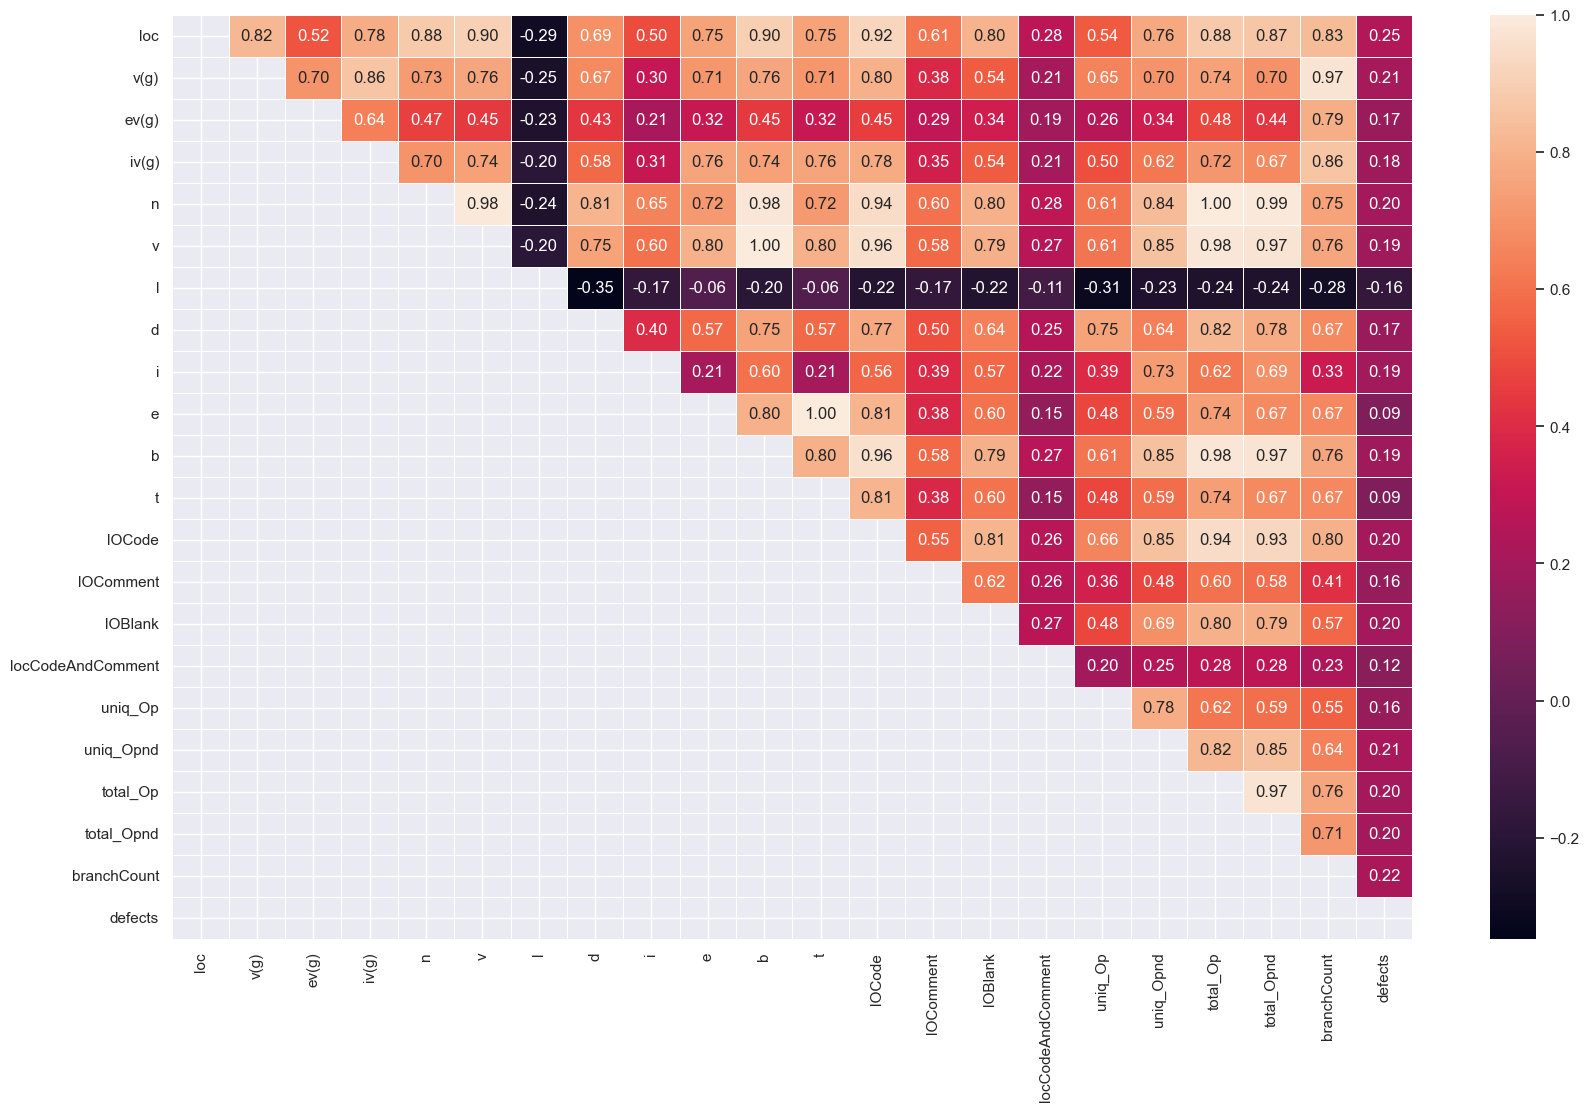

In [49]:
# Plot upper triangle to remove highly correlated features
uptr = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
sns.heatmap(uptr,annot = True, linewidths = .5, fmt = '.2f')

In [50]:
# Identify the feature high collinearity index
drop_feature = [column for column in uptr.columns if any(uptr[column] > 0.95)]

drop_feature

['v', 'b', 't', 'lOCode', 'total_Op', 'total_Opnd', 'branchCount']

In [51]:
sd = sd.drop(columns=sd[drop_feature])
sd

,loc,v(g),ev(g),iv(g),n,l,d,i,e,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,2,2,2,1.2,1.2,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1,1,1,1.0,1.0,True
2,72.0,7.0,1.0,6.0,198.0,0.05,20.31,55.85,23029.10,10,8,1,17.0,36.0,True
3,190.0,3.0,1.0,3.0,600.0,0.06,17.06,254.87,74202.67,29,28,2,17.0,135.0,True
4,37.0,4.0,1.0,4.0,126.0,0.06,17.19,34.86,10297.30,1,6,0,11.0,16.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,0.14,7.33,32.93,1770.86,0,2,0,10.0,15.0,False
10881,9.0,2.0,1.0,2.0,30.0,0.12,8.25,15.72,1069.68,0,2,0,12.0,8.0,False
10882,42.0,4.0,1.0,2.0,103.0,0.04,26.40,19.68,13716.72,1,10,0,18.0,15.0,False
10883,10.0,1.0,1.0,1.0,36.0,0.12,8.44,17.44,1241.57,0,2,0,9.0,8.0,False


In [52]:
#Split independent and dependent variable
X=sd.drop(["defects"],axis=1).copy()
print(X.head())
print('*'*40)
y=sd[["defects"]]
y.head()

     loc  v(g)  ev(g)  iv(g)      n     l      d       i         e  lOComment  \
0    1.1   1.4    1.4    1.4    1.3  1.30   1.30    1.30      1.30          2   
1    1.0   1.0    1.0    1.0    1.0  1.00   1.00    1.00      1.00          1   
2   72.0   7.0    1.0    6.0  198.0  0.05  20.31   55.85  23029.10         10   
3  190.0   3.0    1.0    3.0  600.0  0.06  17.06  254.87  74202.67         29   
4   37.0   4.0    1.0    4.0  126.0  0.06  17.19   34.86  10297.30          1   

   lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  
0        2                  2      1.2        1.2  
1        1                  1      1.0        1.0  
2        8                  1     17.0       36.0  
3       28                  2     17.0      135.0  
4        6                  0     11.0       16.0  
****************************************


,defects
0,False
1,True
2,True
3,True
4,True


In [53]:
#Train test split
train_size=0.8
test_size=0.5
X_train, X_bal, y_train, y_bal = train_test_split(X, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_bal, y_bal, test_size=0.5)

In [54]:
print("X_train ===> ",X_train.shape)
print("y_train ===> ",y_train.shape)
print("X_test ===> ",X_test.shape)
print("y_test ===> ",y_test.shape)

X_train ===>  (7125, 14)
y_train ===>  (7125, 1)
X_test ===>  (891, 14)
y_test ===>  (891, 1)


In [55]:
#Logistic regression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print('Acc:{}'.format(accuracy_score(y_test,y_pred_lr)))
print('F1 score:', f1_score(y_test, y_pred_lr))

print('Recall:', recall_score(y_test, y_pred_lr))

print('Precision:', precision_score(y_test, y_pred_lr))
print('Jaccard:', jaccard_score(y_test, y_pred_lr))
print('Confusion Matrix:{}'.format(confusion_matrix(y_test,y_pred_lr)))

scoring = 'accuracy'
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(lr, X_train, y_train, cv = kfold, scoring = scoring)
cv_results

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred_lr,y_test))

Acc:0.7205387205387206
F1 score: 0.23384615384615384
Recall: 0.18357487922705315
Precision: 0.3220338983050847
Jaccard: 0.13240418118466898
Confusion Matrix:[[604  80]
 [169  38]]
              precision    recall  f1-score   support

       False       0.78      0.88      0.83       684
        True       0.32      0.18      0.23       207

    accuracy                           0.72       891
   macro avg       0.55      0.53      0.53       891
weighted avg       0.67      0.72      0.69       891

[[604  80]
 [169  38]]
ACC:  0.7205387205387206


In [56]:
#Naive bayes
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print('Acc:{}'.format(accuracy_score(y_test,y_pred_nb)))
print('F1 score:', f1_score(y_test, y_pred_nb))

print('Recall:', recall_score(y_test, y_pred_nb))

print('Precision:', precision_score(y_test, y_pred_nb))
print('Jaccard:', jaccard_score(y_test, y_pred_nb))
print('Confusion Matrix:{}'.format(confusion_matrix(y_test,y_pred_nb)))

scoring = 'accuracy'
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(nb, X_train, y_train, cv = kfold, scoring = scoring)
cv_results

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred_nb,y_test))

Acc:0.7519640852974186
F1 score: 0.14007782101167315
Recall: 0.08695652173913043
Precision: 0.36
Jaccard: 0.07531380753138076
Confusion Matrix:[[652  32]
 [189  18]]
              precision    recall  f1-score   support

       False       0.78      0.95      0.86       684
        True       0.36      0.09      0.14       207

    accuracy                           0.75       891
   macro avg       0.57      0.52      0.50       891
weighted avg       0.68      0.75      0.69       891

[[652  32]
 [189  18]]
ACC:  0.7519640852974186


In [57]:
#Stochastic gradient descent

sgd= SGDClassifier()
sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
print('Acc:{}'.format(accuracy_score(y_test,y_pred_sgd)))
print('F1 score:', f1_score(y_test, y_pred_sgd))

print('Recall:', recall_score(y_test, y_pred_sgd))

print('Precision:', precision_score(y_test, y_pred_sgd))
print('Jaccard:', jaccard_score(y_test, y_pred_sgd))
print('Confusion Matrix:{}'.format(confusion_matrix(y_test,y_pred_sgd)))

scoring = 'accuracy'
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(sgd, X_train, y_train, cv = kfold, scoring = scoring)
cv_results

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred_sgd,y_test))

Acc:0.2828282828282828
F1 score: 0.35519677093844604
Recall: 0.8502415458937198
Precision: 0.22448979591836735
Jaccard: 0.21595092024539878
Confusion Matrix:[[ 76 608]
 [ 31 176]]
              precision    recall  f1-score   support

       False       0.71      0.11      0.19       684
        True       0.22      0.85      0.36       207

    accuracy                           0.28       891
   macro avg       0.47      0.48      0.27       891
weighted avg       0.60      0.28      0.23       891

[[ 76 608]
 [ 31 176]]
ACC:  0.2828282828282828


In [58]:
#K nearest neighbour

knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('Acc:{}'.format(accuracy_score(y_test,y_pred_knn)))
print('F1 score:', f1_score(y_test, y_pred_knn))

print('Recall:', recall_score(y_test, y_pred_knn))

print('Precision:', precision_score(y_test, y_pred_knn))
print('Jaccard:', jaccard_score(y_test, y_pred_knn))
print('Confusion Matrix:{}'.format(confusion_matrix(y_test,y_pred_knn)))

scoring = 'accuracy'
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(knn, X_train, y_train, cv = kfold, scoring = scoring)
cv_results

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred_knn,y_test))

Acc:0.7497194163860831
F1 score: 0.25418060200668896
Recall: 0.18357487922705315
Precision: 0.41304347826086957
Jaccard: 0.14559386973180077
Confusion Matrix:[[630  54]
 [169  38]]
              precision    recall  f1-score   support

       False       0.79      0.92      0.85       684
        True       0.41      0.18      0.25       207

    accuracy                           0.75       891
   macro avg       0.60      0.55      0.55       891
weighted avg       0.70      0.75      0.71       891

[[630  54]
 [169  38]]
ACC:  0.7497194163860831


In [59]:
#Decision tree

dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('Acc:{}'.format(accuracy_score(y_test,y_pred_dt)))
print('F1 score:', f1_score(y_test, y_pred_dt))

print('Recall:', recall_score(y_test, y_pred_dt))

print('Precision:', precision_score(y_test, y_pred_dt))
print('Jaccard:', jaccard_score(y_test, y_pred_dt))
print('Confusion Matrix:{}'.format(confusion_matrix(y_test,y_pred_dt)))

scoring = 'accuracy'
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(dt, X_train, y_train, cv = kfold, scoring = scoring)
cv_results

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred_dt,y_test))

Acc:0.6936026936026936
F1 score: 0.3389830508474576
Recall: 0.33816425120772947
Precision: 0.33980582524271846
Jaccard: 0.20408163265306123
Confusion Matrix:[[548 136]
 [137  70]]
              precision    recall  f1-score   support

       False       0.80      0.80      0.80       684
        True       0.34      0.34      0.34       207

    accuracy                           0.69       891
   macro avg       0.57      0.57      0.57       891
weighted avg       0.69      0.69      0.69       891

[[548 136]
 [137  70]]
ACC:  0.6936026936026936


In [60]:
#Random forest

rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('Acc:{}'.format(accuracy_score(y_test,y_pred_rf)))
print('F1 score:', f1_score(y_test, y_pred_rf))

print('Recall:', recall_score(y_test, y_pred_rf))

print('Precision:', precision_score(y_test, y_pred_rf))
print('Jaccard:', jaccard_score(y_test, y_pred_rf))
print('Confusion Matrix:{}'.format(confusion_matrix(y_test,y_pred_rf)))

scoring = 'accuracy'
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(rf, X_train, y_train, cv = kfold, scoring = scoring)
cv_results

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred_rf,y_test))

Acc:0.7609427609427609
F1 score: 0.26804123711340205
Recall: 0.18840579710144928
Precision: 0.4642857142857143
Jaccard: 0.15476190476190477
Confusion Matrix:[[639  45]
 [168  39]]
              precision    recall  f1-score   support

       False       0.79      0.93      0.86       684
        True       0.46      0.19      0.27       207

    accuracy                           0.76       891
   macro avg       0.63      0.56      0.56       891
weighted avg       0.72      0.76      0.72       891

[[639  45]
 [168  39]]
ACC:  0.7609427609427609


In [61]:
#Support vector

svm= SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print('Acc:{}'.format(accuracy_score(y_test,y_pred_svm)))
print('F1 score:', f1_score(y_test, y_pred_svm))

print('Recall:', recall_score(y_test, y_pred_svm))

print('Precision:', precision_score(y_test, y_pred_svm))
print('Jaccard:', jaccard_score(y_test, y_pred_svm))
print('Confusion Matrix:{}'.format(confusion_matrix(y_test,y_pred_svm)))

scoring = 'accuracy'
kfold = KFold(n_splits = 10)
cv_results = cross_val_score(svm, X_train, y_train, cv = kfold, scoring = scoring)
cv_results

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_test,y_pred_svm))

Acc:0.7654320987654321
F1 score: 0.018779342723004695
Recall: 0.00966183574879227
Precision: 0.3333333333333333
Jaccard: 0.009478672985781991
Confusion Matrix:[[680   4]
 [205   2]]
              precision    recall  f1-score   support

       False       0.77      0.99      0.87       684
        True       0.33      0.01      0.02       207

    accuracy                           0.77       891
   macro avg       0.55      0.50      0.44       891
weighted avg       0.67      0.77      0.67       891

[[680   4]
 [205   2]]
ACC:  0.7654320987654321
